Tarea Final

In [1]:
import pandas as pd
from numpy import array
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,LSTM
from keras.layers import Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import hstack
from keras.layers.merge import concatenate

In [3]:
df=pd.read_csv("Daily_Demand_Forecasting_Orders.csv")

In [4]:
data = pd.DataFrame(df['Week of the month (first week'].str.split(';',13).tolist(),
                    columns = 
                    ['fourth','Day_of_the_week','Non-urgent-order',
                     'Urgent-order','OrderA','OrderB','OrderC','Fiscal','traffic-orders',
                     'Banking-orders-1','Banking-orders-2','Banking-orders-3','target'])

In [5]:
data.isnull().any()

fourth              False
Day_of_the_week     False
Non-urgent-order    False
Urgent-order        False
OrderA              False
OrderB              False
OrderC              False
Fiscal              False
traffic-orders      False
Banking-orders-1    False
Banking-orders-2    False
Banking-orders-3    False
target              False
dtype: bool

In [6]:
data.isnull().sum()
data.dtypes

fourth              object
Day_of_the_week     object
Non-urgent-order    object
Urgent-order        object
OrderA              object
OrderB              object
OrderC              object
Fiscal              object
traffic-orders      object
Banking-orders-1    object
Banking-orders-2    object
Banking-orders-3    object
target              object
dtype: object

In [7]:
data = data.astype(float)
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1.0,4.0,316.307,223.270,61.543,175.586,302.448,0.000,65556.0,44914.0,188411.0,14793.0,539.577
1,1.0,5.0,128.633,96.042,38.058,56.037,130.580,0.000,40419.0,21399.0,89461.0,7679.0,224.675
2,1.0,6.0,43.651,84.375,21.826,25.125,82.461,1.386,11992.0,3452.0,21305.0,14947.0,129.412
3,2.0,2.0,171.297,127.667,41.542,113.294,162.284,18.156,49971.0,33703.0,69054.0,18423.0,317.120
4,2.0,3.0,90.532,113.526,37.679,56.618,116.220,6.459,48534.0,19646.0,16411.0,20257.0,210.517


Data Set Information:

The database was collected during 60 days, this is a real database of a Brazilian company of large logistics.
Twelve predictive attributes and a target that is the total of orders for daily. treatment

*columns:
    
fourth or fifth week;
Day of the week (Monday to Friday);
Non-urgent order;
Urgent order;
Order type A;
Order type B;
Order type C;
Fiscal sector orders;
Orders from the traffic controller sector;
Banking orders (1);
Banking orders (2);
Banking orders (3);
Target (Total orders)

In [8]:
data.corr(method='spearman')

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
fourth,1.000000,-0.199278,0.305295,0.241157,0.330137,0.352502,-0.028597,-0.079508,-0.252482,0.336937,0.185186,-0.144296,0.305124
Day_of_the_week,-0.199278,1.000000,-0.420315,-0.579100,-0.117890,-0.400549,-0.513277,0.170226,-0.314024,-0.011089,-0.576349,0.088084,-0.454517
Non-urgent-order,0.305295,-0.420315,1.000000,0.479800,0.496749,0.801500,0.653626,-0.050380,0.109586,0.682356,0.732759,0.063851,0.865518
Urgent-order,0.241157,-0.579100,0.479800,1.000000,0.517422,0.580495,0.621506,-0.192920,0.117977,0.264296,0.560600,-0.061851,0.750320
OrderA,0.330137,-0.117890,0.496749,0.517422,1.000000,0.448902,0.202334,0.063674,-0.184107,0.585274,0.306696,0.069408,0.558099
OrderB,0.352502,-0.400549,0.801500,0.580495,0.448902,1.000000,0.410058,-0.000056,-0.041623,0.580661,0.741539,0.011892,0.892192
OrderC,-0.028597,-0.513277,0.653626,0.621506,0.202334,0.410058,1.000000,-0.129247,0.358488,0.278022,0.546430,0.024340,0.698972
Fiscal,-0.079508,0.170226,-0.050380,-0.192920,0.063674,-0.000056,-0.129247,1.000000,-0.055742,0.020498,-0.162089,0.391594,-0.018264
traffic-orders,-0.252482,-0.314024,0.109586,0.117977,-0.184107,-0.041623,0.358488,-0.055742,1.000000,-0.265907,0.125590,0.239066,0.046346
Banking-orders-1,0.336937,-0.011089,0.682356,0.264296,0.585274,0.580661,0.278022,0.020498,-0.265907,1.000000,0.247513,0.141706,0.588108


In [9]:

from math import sqrt
from numpy import median, mean, std
from pandas import read_csv,concat,DataFrame
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense,Flatten


In [10]:
def model_predict_2(model,data_historica,conf):
    valores=list()
    for lag in conf:
        valores.append(data_historica[-lag])
    return median(valores)

In [11]:
def model_fit(train,cf):
    return None

In [12]:
def medir_rmse(real,predict):
    return sqrt(mean_squared_error(real,predict))

In [ ]:
DIVIDIR TRAIN TEST

In [14]:
def train_test(data,n_test):
    return data[:-n_test],data[-n_test:]

In [ ]:
SUPERVISED LEARNING

In [15]:
def supervised_ts(data,n_steps,n_outs=1):
    df=DataFrame(data)
    cols=list()
    for i in range(n_steps,0,-1):
        cols.append(df.shift(i))
    for i in range(0,n_outs):
        cols.append(df.shift(-i))
    dataset=concat(cols,axis=1)
    dataset.dropna(inplace=True)
    return dataset.values

In [26]:

#time series univariado
#TOMAMOS EL DATASET 
def walk_forward_validation(data,n_test,cnf):
    predicciones=list()
    #dividir data
    train,test=train_test(data,n_test) #dividimos la data
    #ajustar el modelo
    modelo=model_fit(train,cnf)
    data_historica=[x for x in train]
    for i in range(len(test)):
        y_predict=model_predict(modelo,data_historica,cnf)
        #agregamos a la lista de predicciones
        predicciones.append(y_predict)
        data_historica.append(test[i])
    error=medir_rmse(test,predicciones)
    print(error)
    return error
        
    

In [17]:
def repetir_evaluacion(data,conf,n_test,n_repeticiones=20):
    scores=[walk_forward_validation(data,n_test,conf) for _ in range(n_repeticiones)]
    return scores

OBTENER PERFORMANCE

In [18]:
def plot_bigote(scores):
    scores_media,score_std=mean(scores),std(scores)
    print('%.f RMSE std: %.f' % (scores_media,score_std))
    pyplot.boxplot(scores)
    pyplot.show()
    
    

In [27]:
def model_predict(model,data_historica,conf):
    n_steps,_,_,_,_=conf
    #preparar la data
    x_input=array(data_historica[-n_steps:]).reshape((1,n_steps,1))
    y_predict=model.predict(x_input)
    return y_predict[0]
    

In [19]:
series=data[['OrderB']]

In [28]:
dataT=series.values
n_test=12
config=[12,24,36]

#scores
scores=repetir_evaluacion(dataT,config,n_test,30)
plot_bigote(scores)

ValueError: not enough values to unpack (expected 5, got 3)

In [ ]:
# el diagrama de bigotes te da la distribucion de errrores

In [102]:
def model_fit(train,cf):
    n_steps,n_filtros,size_kernel,n_epochs,n_batch=cf
    
    data_set=supervised_ts(train,n_steps)
    #definir modelos
    modelo_cnn=Sequential()
    train_x,train_y =data_set[:,:-1],data_set[:,-1] #2d
    train_x=train_x.reshape((train_x.shape[0],train_x.shape[1],1))
    
    
    modelo_cnn.add(Conv1D(n_filtros,size_kernel,activation='relu',input_shape=(n_steps,1)))
    modelo_cnn.add(Conv1D(n_filtros,size_kernel,activation='relu'))
    modelo_cnn.add(MaxPooling1D())
    modelo_cnn.add(Flatten())
    modelo_cnn.add(Dense(1))
    #ajustar: 
    modelo_cnn.compile(loss='mse',optimizer='adam')
    modelo_cnn.fit(train_x,train_y,epochs=n_epochs,batch_size=n_batch)
    return modelo_cnn
    
    

In [105]:
config=[24,256,3,50,32]
n_test=12
scores=repetir_evaluacion(data,config,n_test)


Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 18997.8574
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 9553.2734
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 4626.9312
Epoch 4/50
1/1 [==============================] - 0s 1000us/step - loss: 3629.8015
Epoch 5/50
1/1 [==============================] - 0s 1000us/step - loss: 5434.1440
Epoch 6/50
1/1 [==============================] - 0s 995us/step - loss: 6146.8970
Epoch 7/50
1/1 [==============================] - 0s 1000us/step - loss: 5251.3569
Epoch 8/50
1/1 [==============================] - 0s 991us/step - loss: 4028.6797
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 3287.8093
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 3145.8750
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 3353.2258
Epoch 12/50
1/1 [==============================] - 0s 999us/step - loss: 3621.4504
Epoch 13/50
1/1 [====

96 RMSE std: 4


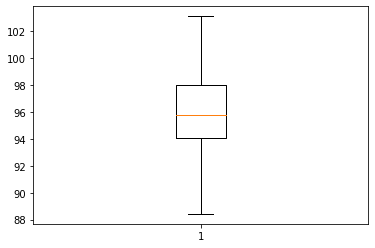

In [106]:
plot_bigote(scores)

In [ ]:
CNN+LSTM

In [134]:
def model_fit_LSTM(train,cf):
    n_steps,n_nodos,n_epochs,n_batch,n_diff=cf
    
    if n_diff>0:
        train=diferenciar(train,n_diff)
        
    
    data_set=supervised_ts(train,n_steps)
    #definir modelos
    
    train_x,train_y =data_set[:,:-1],data_set[:,-1] #2d
    train_x=train_x.reshape((train_x.shape[0],train_x.shape[1],1)) #univariado
    
    modelo_lstm=Sequential()
    modelo_lstm.add(LSTM(n_nodos,activation='relu',input_shape=(n_steps,1)))
    #modelo_lstm.add(Conv1D(n_nodos,size_kernel,activation='relu'))
    #modelo_lstm.add(MaxPooling1D())
    #modelo_lstm.add(Flatten())
    modelo_lstm.add(Dense(n_nodos, activation='relu'))
    modelo_lstm.add(Dense(1))
    #ajustar: 
    modelo_lstm.compile(loss='mse',optimizer='adam')
    modelo_lstm.fit(train_x,train_y,epochs=n_epochs,batch_size=n_batch)
    return modelo_lstm
    
    

In [112]:
def model_predict_LSTM(model,data_historica,conf):
    n_steps,_,_,_,n_diff=conf
    #preparar la data
    temp=0.0
    if n_diff>0:
        temp=data_historica[-n_diff]
        data_historica=diferenciar(data_historica,n_diff)
        
    x_input=array(data_historica[-n_steps:]).reshape((1,n_steps,1))
    y_predict=model.predict(x_input)
    return temp+y_predict[0]
    

In [113]:
#preprocesamiento
#transformar una serie temporal
def diferenciar(data,interval):
    return [data[i]-data[i-interval] for i in range (interval,len(data))]


In [116]:
def repetir_evaluacion_(data,conf,n_test,n_repeticiones=20):
    scores=[walk_forward_validation_(data,n_test,conf) for _ in range(n_repeticiones)]
    return scores

In [117]:

#time series univariado
#TOMAMOS EL DATASET 
def walk_forward_validation_(data,n_test,cnf):
    predicciones=list()
    #dividir data
    train,test=train_test(data,n_test) #dividimos la data
    #ajustar el modelo
    modelo=model_fit_LSTM(train,cnf)
    data_historica=[x for x in train]
    for i in range(len(test)):
        y_predict=model_predict_LSTM(modelo,data_historica,cnf)
        #agregamos a la lista de predicciones
        predicciones.append(y_predict)
        data_historica.append(test[i])
    error=medir_rmse(test,predicciones)
    print(error)
    return error
        
    

In [130]:
config=[36,64,100,2,12]

In [133]:
data=series.values
n_test=12
scores=repetir_evaluacion_(data,config,n_test)

Epoch 1/100


UnboundLocalError: local variable 'logs' referenced before assignment

In [ ]:
################################################

In [15]:
def split_sequence_multistep(sequence, n_steps, n_outputs):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        out_end = end_ix + n_outputs
        if out_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [20]:
def split_sequence_multistep_multivar(sequence, n_steps, n_outputs):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        out_end = end_ix + n_outputs-1
        if out_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix-1:out_end,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [13]:
arrayX=data[['OrderB']]
#arrayX

In [14]:

from numpy import array
arrayX=array(arrayX)

In [17]:
n_steps,n_steps_out=3,2
X_enco_deco,y_enco_deco=split_sequence_multistep(arrayX,n_steps,n_steps_out)

In [24]:
#y_enco_deco
n_features=1

X_enco_deco=X_enco_deco.reshape((X_enco_deco.shape[0],X_enco_deco.shape[1],n_features))
y_enco_deco=y_enco_deco.reshape((y_enco_deco.shape[0],y_enco_deco.shape[1],n_features))

In [26]:
from keras.layers import RepeatVector
from keras.layers import LSTM
model_enco_deco=Sequential()
#encoder:
model_enco_deco.add(LSTM(80,activation='relu',input_shape=(n_steps,n_features)))
#repetir el vector d contexto
model_enco_deco.add(RepeatVector(n_steps_out))


In [37]:
#decoder:
model_enco_deco.add(LSTM(150,activation='relu',return_sequences=True))

In [38]:
from keras.layers import TimeDistributed

model_enco_deco.add(TimeDistributed(Dense(1)))

In [50]:
model_enco_deco.compile(optimizer='adam',loss='mse')
history=model_enco_deco.fit(X_enco_deco,y_enco_deco,epochs=800)

Epoch 1/800
2/2 [==============================] - 0s 4ms/step - loss: 1481.4464
Epoch 2/800
2/2 [==============================] - 0s 4ms/step - loss: 2118.2617
Epoch 3/800
2/2 [==============================] - 0s 4ms/step - loss: 1423.5990
Epoch 4/800
2/2 [==============================] - 0s 4ms/step - loss: 1206.2760
Epoch 5/800
2/2 [==============================] - 0s 4ms/step - loss: 897.7191
Epoch 6/800
2/2 [==============================] - 0s 4ms/step - loss: 978.6672
Epoch 7/800
2/2 [==============================] - 0s 3ms/step - loss: 822.2088
Epoch 8/800
2/2 [==============================] - 0s 5ms/step - loss: 612.8389
Epoch 9/800
2/2 [==============================] - 0s 4ms/step - loss: 590.1946
Epoch 10/800
2/2 [==============================] - 0s 5ms/step - loss: 623.1037
Epoch 11/800
2/2 [==============================] - 0s 4ms/step - loss: 575.8854
Epoch 12/800
2/2 [==============================] - 0s 4ms/step - loss: 525.9117
Epoch 13/800
2/2 [===============

In [51]:
X_enco_deco[0]

array([[175.586],
       [ 56.037],
       [ 25.125]])

In [52]:
x_test=X_enco_deco[0]

In [53]:
x_test=x_test.reshape((1,n_steps,n_features))

In [54]:
y_test=model_enco_deco.predict(x_test)

In [55]:
y_test

array([[[112.81259 ],
        [ 56.196815]]], dtype=float32)

In [56]:
y_enco_deco[0]

array([[113.294],
       [ 56.618]])

In [58]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss'])


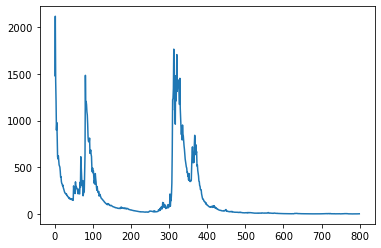

In [62]:
xc= range(800)
val_loss   = history.history['loss']
plt.plot(xc, val_loss)


In [ ]:
#lo mejor sería escoger 300

In [15]:
#MULTISTEP

In [16]:
data.head()

,fourth,Day_of_the_week,Non-urgent-order,Urgent-order,OrderA,OrderB,OrderC,Fiscal,traffic-orders,Banking-orders-1,Banking-orders-2,Banking-orders-3,target
0,1.0,4.0,316.307,223.270,61.543,175.586,302.448,0.000,65556.0,44914.0,188411.0,14793.0,539.577
1,1.0,5.0,128.633,96.042,38.058,56.037,130.580,0.000,40419.0,21399.0,89461.0,7679.0,224.675
2,1.0,6.0,43.651,84.375,21.826,25.125,82.461,1.386,11992.0,3452.0,21305.0,14947.0,129.412
3,2.0,2.0,171.297,127.667,41.542,113.294,162.284,18.156,49971.0,33703.0,69054.0,18423.0,317.120
4,2.0,3.0,90.532,113.526,37.679,56.618,116.220,6.459,48534.0,19646.0,16411.0,20257.0,210.517


In [19]:
seq1=data[['OrderB']]
seq2=data[['OrderC']]
seq3=data[['Non-urgent-order']]
seq1=array(seq1)
seq2=array(seq2)
seq3=array(seq3)
seq1=seq1.reshape((len(seq1),1))
seq2=seq2.reshape((len(seq2),1))
seq3=seq3.reshape((len(seq3),1))

In [21]:
dataset_m_steps=hstack((seq1,seq2,seq3))
n_step_in, n_steps_out=3,2

In [22]:
X_m_mstep,y_m_mstep=split_sequence_multistep_multivar(dataset_m_steps,n_step_in,n_steps_out)

In [26]:
for i in range (len(X_m_mstep)):
    #print (X_m_mstep[i],y_m_mstep[i] )
    pass

In [27]:
n_features=X_m_mstep.shape[2]

In [32]:
#modelo lstm:
from keras.layers import RepeatVector
from keras.layers import LSTM
model_m_mstep=Sequential()
#encoder:
model_m_mstep.add(LSTM(100,activation='relu',return_sequences=True,input_shape=(n_step_in,n_features)))
model_m_mstep.add(LSTM(100,activation='relu'))
model_m_mstep.add(Dense(n_steps_out))
model_m_mstep.compile(optimizer='adam',loss='mse')
history=model_m_mstep.fit(X_m_mstep,y_m_mstep,epochs=1000)
#repetir el vector d contexto
model_m_mstep.add(RepeatVector(n_steps_out))


Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 33859.9180
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 33062.3008
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 32203.9590
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 31049.9180
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 29433.5195
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 27183.1484
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 23973.3809
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 19770.6543
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 14206.0684
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 9167.0898
Epoch 11/1000
2/2 [==============================] - 0s 3ms/step - loss: 6343.7144
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 7357.3047
Epoc

In [35]:
x_input=X_m_mstep[0]
x_input=x_input.reshape((1,n_step_in,n_features))
y_pred=model_m_mstep.predict(x_input)

In [36]:
y_pred

array([[[ 43.823547, 171.4573  ],
        [ 43.823547, 171.4573  ]]], dtype=float32)

In [37]:
y_m_mstep[0]

array([ 43.651, 171.297])

In [41]:
def split_sequence_multistep_multivar_parallel(sequence, n_steps, n_outputs):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        out_end = end_ix + n_outputs-1
        if out_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix,:], sequence[end_ix:out_end,:]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [42]:
# multistep parallel forecasting
seq1=data[['OrderB']]
seq2=data[['OrderC']]
seq3=data[['Non-urgent-order']]
seq1=array(seq1)
seq2=array(seq2)
seq3=array(seq3)
seq1=seq1.reshape((len(seq1),1))
seq2=seq2.reshape((len(seq2),1))
seq3=seq3.reshape((len(seq3),1))
dataset_m_parallel=hstack((seq1,seq2,seq3))
n_step_in, n_steps_out=3,2
X,y=split_sequence_multistep_multivar_parallel(dataset_m_parallel,n_step_in,n_steps_out)
n_features=X.shape[2]

In [45]:
from keras.layers import TimeDistributed
#modelo lstm:
from keras.layers import RepeatVector
from keras.layers import LSTM
modelo_fore=Sequential()
#encoder:
modelo_fore.add(LSTM(100,activation='relu',input_shape=(n_step_in,n_features)))
#modelo_fore.add(LSTM(100,activation='relu'))
modelo_fore.add(RepeatVector(n_steps_out))
modelo_fore.add(LSTM(150,activation='relu',return_sequences=True))
modelo_fore.add(TimeDistributed(Dense(n_features)))
#modelo_fore.add(Dense(n_steps_out))
modelo_fore.compile(optimizer='adam',loss='mse')
history=modelo_fore.fit(X,y,epochs=1000)



Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 23068.9824
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 22620.5703
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 21988.6836
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 21158.7871
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 19939.2266
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 18160.7324
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 15773.4443
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 12913.8018
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 9407.4014
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 8103.8521
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: 8563.8896
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 7808.3472
Epoch

In [37]:
x_input=X[0]
x_input=x_input.reshape((1,n_step_in,n_features))
y_pred=modelo_fore.predict(x_input)

NameError: name 'X' is not defined

In [49]:
y_pred

array([[[113.28871, 162.27814, 171.29468],
        [113.2857 , 162.28113, 171.29077]]], dtype=float32)

In [50]:
y[0]

array([[113.294, 162.284, 171.297]])